<a href="https://colab.research.google.com/github/vighc/google-colab-sql/blob/main/sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INSTALL PYTHON SQL PACKAGE
!pip install ipython-sql

# LOAD SQL EXTENSION
%load_ext sql

# CREATE SQLite DB
%sql sqlite://

### QUERY 1: Print meaningful comments

In [ ]:
# CREATE AND LOAD THE TABLE

%%sql
CREATE TABLE IF NOT EXISTS COMMECT_TAB(
	id				int,
	comment			varchar(100),
	translation		varchar(100)
);

INSERT INTO COMMECT_TAB VALUES
(1, 'very good', null),
(2, 'good', null),
(3, 'bad', null),
(4, 'ordinary', null),
(5, 'cdcdcdcd', 'very bad'),
(6, 'excellent', null),
(7, 'ababab', 'not satisfied'),
(8, 'satisfied', null),
(9, 'aabbaabb', 'extraordinary'),
(10, 'ccddccbb', 'medium');

SELECT * FROM COMMECT_TAB;

In [ ]:
#PRINT TRASFORMED DATA

%%sql
SELECT ID,
CASE
  WHEN translation IS NULL
    THEN comment
  ELSE translation
END AS COMMENTS
FROM COMMECT_TAB;

### QUERY 2: Derive desired output

In [ ]:
# CREATE AND LOAD THE TABLE

%%sql
CREATE TABLE source
    (
        id      int,
        name    varchar(1)
    );

CREATE TABLE target
    (
        id      int,
        name    varchar(1)
    );

INSERT INTO source VALUES
(1, 'A'),
(2, 'B'),
(3, 'C'),
(4, 'D');

INSERT INTO target VALUES
(1, 'A'),
(2, 'B'),
(4, 'X'),
(5, 'F');

SELECT * from source;

In [ ]:
%%sql
SELECT * from target;

In [ ]:
#PRINT TRASFORMED DATA

%%sql
SELECT A.ID, 'NEW IN SOURCE' AS COMMENT FROM source A
LEFT JOIN TARGET B
ON A.ID=B.ID
WHERE B.ID IS NULL UNION

SELECT A.ID, 'NEW IN TARGET' AS COMMENT FROM TARGET A
LEFT JOIN source B
ON A.ID=B.ID
WHERE B.ID IS NULL UNION

SELECT A.ID, 'MISMATCH' AS COMMENT FROM source A
JOIN TARGET B
ON A.ID=B.ID
WHERE A.NAME<>B.NAME

### QUERY 3: IPL Matches

In [ ]:
# CREATE AND LOAD THE TABLE

%%sql
create table teams
    (
        team_code       varchar(10),
        team_name       varchar(40)
    );

insert into teams values ('RCB', 'Royal Challengers Bangalore'),
('MI', 'Mumbai Indians'),
('CSK', 'Chennai Super Kings'),
('DC', 'Delhi Capitals'),
('RR', 'Rajasthan Royals'),
('SRH', 'Sunrisers Hyderbad'),
('PBKS', 'Punjab Kings'),
('KKR', 'Kolkata Knight Riders'),
('GT', 'Gujarat Titans'),
('LSG', 'Lucknow Super Giants');

SELECT * from teams;

EXPLAIN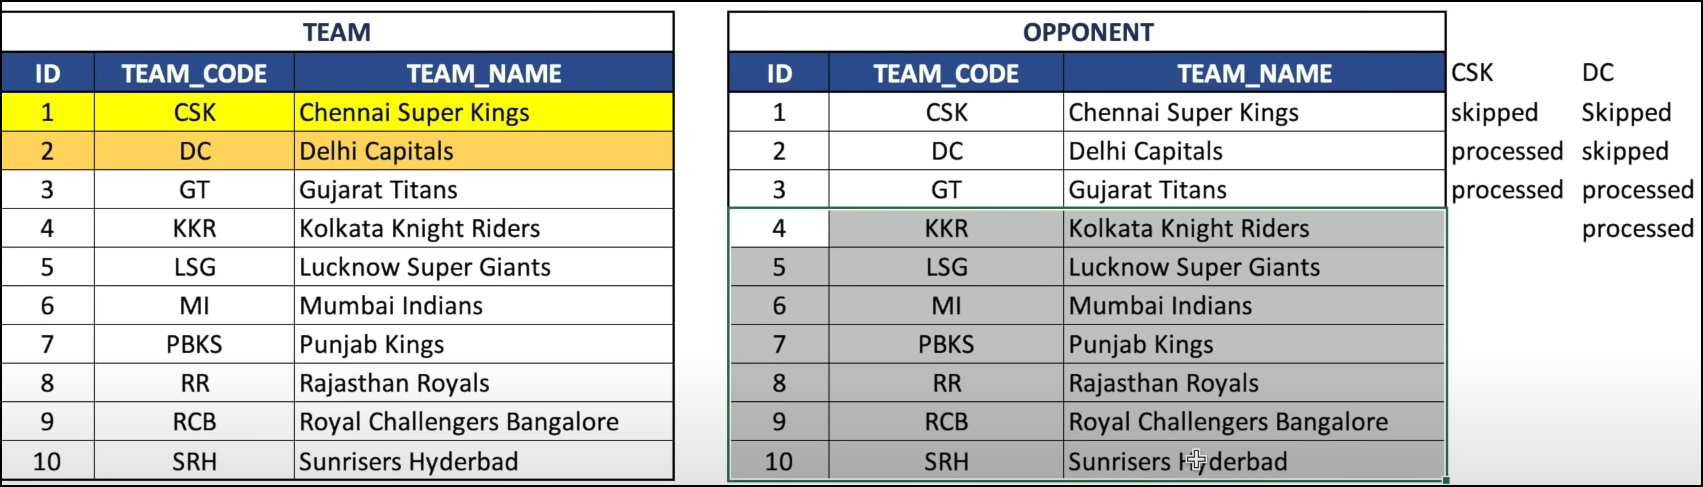

In [ ]:
#PRINT TRASFORMED DATA

%%sql
WITH TEAM AS(
SELECT ROW_NUMBER() OVER(ORDER BY TEAM_CODE) AS ID, * FROM teams)

SELECT T1.team_name,T2.team_name FROM TEAM T1
JOIN TEAM T2
ON T1.ID<T2.ID